# INFORMATION GAIN
Mutual information measures how much imformation the presence/absence of a feature contributes to making the correct prediction on Y

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

from sklearn.datasets import load_boston


### Dealing with Classification

In [165]:

diabetes = pd.read_csv('diabetes.csv')

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [167]:
diabetes.shape
df = diabetes.copy()

In [168]:
x = df.drop('Outcome', axis=1)

y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)



X_train.shape, X_test.shape

((537, 8), (231, 8))

In [169]:
mi = mutual_info_classif(X_train.fillna(0),y_train) # cant work with na values so we input 0 for na if there are any
mi

array([0.03499293, 0.10074018, 0.03082652, 0.01283364, 0.03223513,
       0.08251742, 0.        , 0.08872706])

In [170]:
# create a series with the values
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending = False) # rank it from the lowest to the highest mutual information

Glucose                     0.100740
Age                         0.088727
BMI                         0.082517
Pregnancies                 0.034993
Insulin                     0.032235
BloodPressure               0.030827
SkinThickness               0.012834
DiabetesPedigreeFunction    0.000000
dtype: float64

<AxesSubplot:>

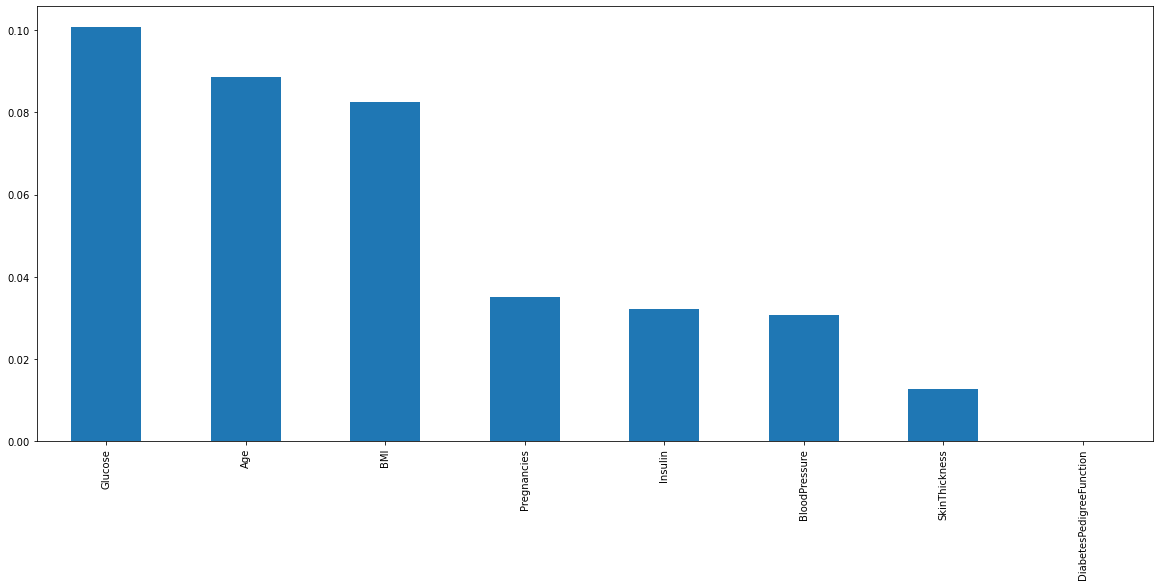

In [171]:
mi.sort_values(ascending = False).plot.bar(figsize=(20,8))

we observe that first 4 features contribute most to the target than the other 4, and we have DiabetesPedigreeFuction to have no ncontribution to the targets. We could decide to take our cut-off from 0.6 leaving out the rest or preferrrably leve out DiabetesPedigreeFuction alone.
Selecting this cutoff is arbitrary. most common way in practice is to select the top 10 or 20, orthe features in the 10th percentile of the MI distribution.

To do this, we can use mutual info in combination with SelectKBest or SelectPercentil from Sklearn.
SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile.see below

In [172]:
top_4 =SelectKBest(mutual_info_classif, k=4).fit(X_train.fillna(0),y_train)
X_train.columns[top_4.get_support()]

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')

### Dealing with Regression

In [173]:
data = load_boston()

dir(data)

boston = pd.DataFrame(data.data, columns=data.feature_names)

boston['target'] = pd.DataFrame(data.target, columns=['target'])
df = boston.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [174]:
x = df.drop('target', axis=1)

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)



X_train.shape, X_test.shape

((354, 13), (152, 13))

In [175]:
mi = mutual_info_regression(X_train.fillna(0),y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

LSTAT      0.657591
RM         0.592416
INDUS      0.528916
PTRATIO    0.493560
NOX        0.448923
TAX        0.366243
AGE        0.339921
CRIM       0.327309
DIS        0.311630
RAD        0.210001
ZN         0.190303
B          0.169428
CHAS       0.008911
dtype: float64

<AxesSubplot:>

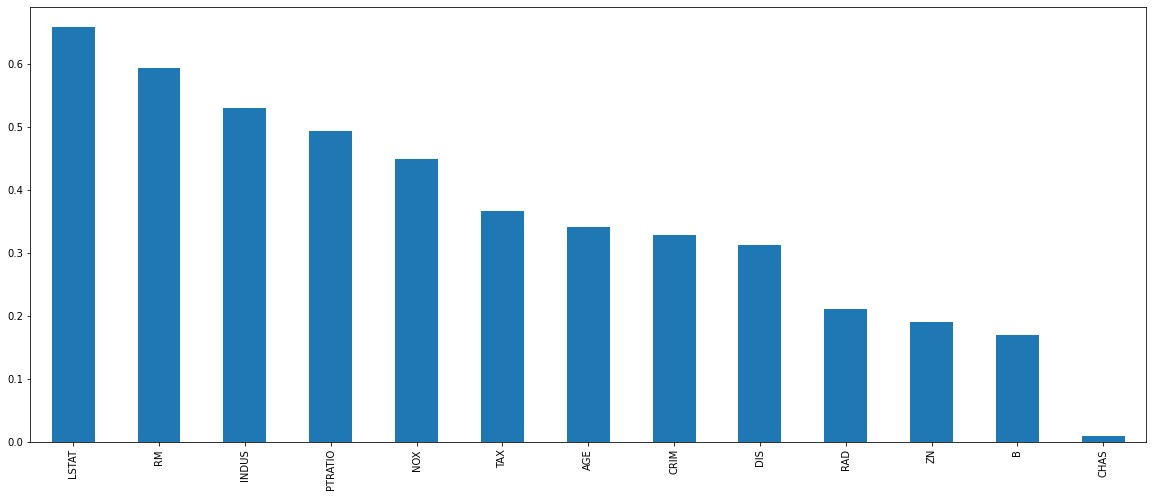

In [176]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [177]:
# select top 90 percentile

In [178]:
# select top 90 percentile 
top_90 = SelectPercentile(mutual_info_regression, percentile=90).fit(X_train.fillna(0),y_train)
X_train.columns[top_10.get_support()]

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

# FISHER SCORE - CHI-SQUARE 
Compute chi-squared stats between each non-negative feature and class
* This score should be used to evaluate categorical variables in a classification task.

In [125]:
from sklearn.feature_selection import chi2

In [179]:
titanic = pd.read_csv('titanic_data.csv')
data = titanic.copy()
data.shape

(891, 12)

In [180]:
data.Sex.unique(), data.Pclass.unique(), data.Embarked.unique()

(array(['male', 'female'], dtype=object),
 array([3, 1, 2], dtype=int64),
 array(['S', 'C', 'Q', nan], dtype=object))

In [181]:
# the categorical variables in the titanic dataset are pclass, sex, and Embarkered
# encoding the labels into number 
#for sex
data['Sex'] = np.where(data.Sex == 'male', 1,0)

#for embarked
ordinal_label = {k: i for i, k in enumerate(data['Embarked'].unique(),0)}
data['Embarked'] = data['Embarked'].map(ordinal_label)

#Pclass is already ordinal

In [182]:
data.Sex.unique(), data.Pclass.unique(), data.Embarked.unique()

(array([1, 0]),
 array([3, 1, 2], dtype=int64),
 array([0, 1, 2, 3], dtype=int64))

In [183]:
X = data[['Pclass','Sex','Embarked']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [184]:
f_score = chi2(X_train,y_train)
f_score

(array([21.61080949, 63.55447864, 11.83961845]),
 array([3.33964360e-06, 1.55992554e-15, 5.79837058e-04]))

In [185]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending = False)

Embarked    5.798371e-04
Pclass      3.339644e-06
Sex         1.559926e-15
dtype: float64

the higher the p_value the more significant the feature is to predict the target, therefore sex is the nost important feature

If the dataset contains several categorical variables, we could then combine this procedure with selectKBest or selectPercentile.

# UNIVARIATE FEATURE SELECTION
Univariate feature selection works by selecting the best features based on univariate statistical tests(ANOVA)

### Dealing with Classification

In [186]:
from sklearn.feature_selection import f_classif, f_regression

In [193]:
df = diabetes.copy()

In [194]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [197]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

In [199]:
univariate = f_classif(X_train.fillna(0),y_train)
univariate

(array([ 20.70337192, 155.79449915,   7.51302797,   1.93189845,
         10.31989873,  59.91369622,  11.89487346,  44.22285562]),
 array([6.70363721e-06, 2.11323665e-31, 6.33953164e-03, 1.65154895e-01,
        1.39884689e-03, 5.32787954e-14, 6.09299490e-04, 7.53385094e-11]))

In [200]:
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False)

SkinThickness               1.651549e-01
BloodPressure               6.339532e-03
Insulin                     1.398847e-03
DiabetesPedigreeFunction    6.092995e-04
Pregnancies                 6.703637e-06
Age                         7.533851e-11
BMI                         5.327880e-14
Glucose                     2.113237e-31
dtype: float64

<AxesSubplot:>

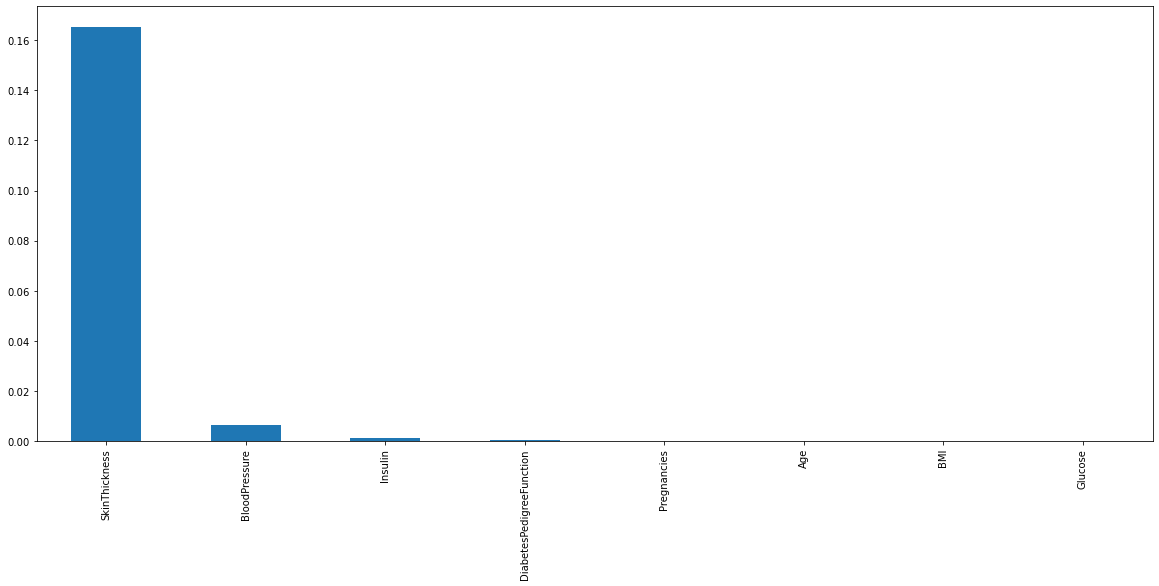

In [202]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

Remember that the lower the pvalue the most predictive the feature is to the target

In [205]:
sel = SelectKBest(f_classif, k=4).fit(X_train.fillna(0),y_train)
X_train.columns[sel.get_support()]

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')

In [206]:
X_train.shape

(514, 8)

In [207]:
X_train = sel.transform(X_train.fillna(0))
X_train.shape

(514, 4)

### Dealing with Regression

In [208]:
df = boston.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [210]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((339, 13), (167, 13))

In [212]:
univariate = f_regression(X_train.fillna(0), y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False)

CHAS       1.476645e-05
DIS        4.442867e-06
B          4.394850e-10
ZN         2.468072e-10
AGE        7.911336e-12
CRIM       8.973845e-13
RAD        3.305663e-13
NOX        8.409701e-16
TAX        2.758976e-18
INDUS      8.414270e-19
PTRATIO    6.740626e-22
RM         8.564034e-50
LSTAT      3.528483e-62
dtype: float64

<AxesSubplot:>

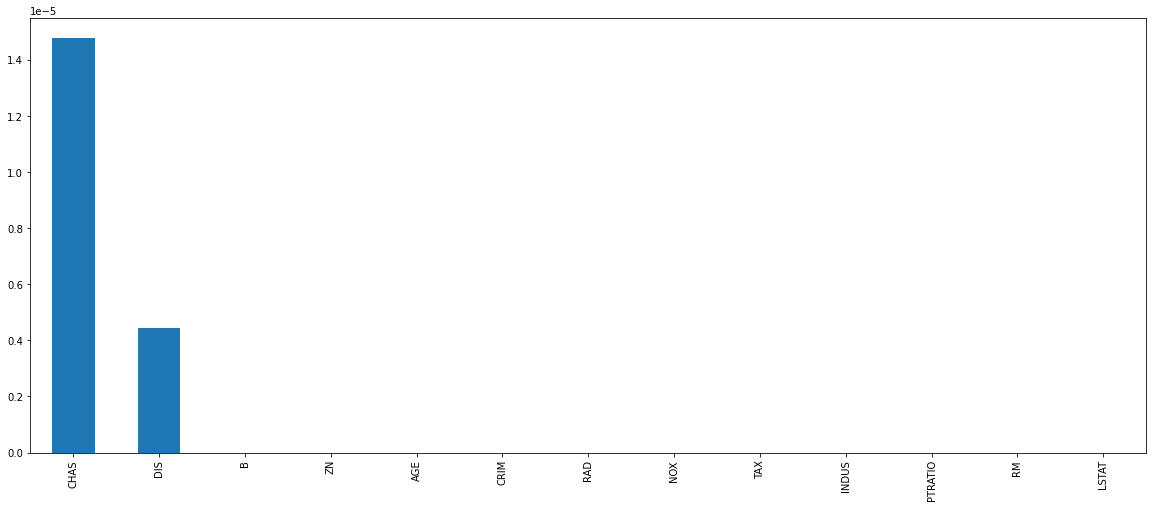

In [217]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [218]:
sel = SelectPercentile(f_regression, percentile=90).fit(X_train.fillna(0),y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [219]:
X_train = sel.transform(X_train)

In [220]:
X_train.shape

(339, 11)

# UNIVARIATE ROC-AUC OR RMSE

In [221]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #you can choose any algorithm 
from sklearn.metrics import roc_auc_score, mean_squared_error

In [222]:
df = diabetes.copy()
df.shape

(768, 9)

In [223]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [225]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((514, 8), (254, 8))

In [256]:
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test,y_scored[:,1]))

In [263]:
roc_values= pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False) git@github.com:Tobi-DataDetective/Feature_Selection_Methods.git

Glucose                     0.655939
BMI                         0.623823
Age                         0.622162
Pregnancies                 0.606105
SkinThickness               0.571844
Insulin                     0.549211
DiabetesPedigreeFunction    0.505226
BloodPressure               0.492836
dtype: float64

<AxesSubplot:>

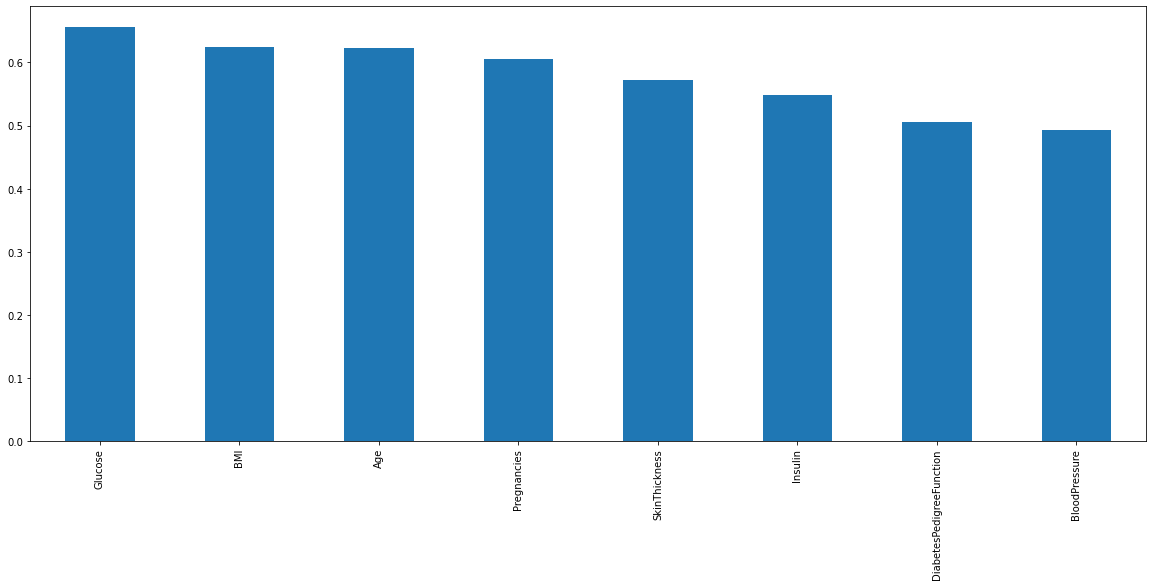

In [264]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

a roc auc of value 0.5 indicates random decision


In [267]:
# finding features with higher roc auc i.e above 0.5
len(roc_values[roc_values > 0.5])

7

7 of 8 features shows a predictive performance higher than 0.5. this means that we can remove that 1 from the dataset. 
But recall that where we put the cutoff is a bit arbituary

### Dealing with Regression

In [292]:
df = boston.copy()
df.shape

(506, 14)

In [293]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [294]:
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test,y_scored))

In [295]:
mse_values= pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False)

AGE        150.375625
DIS        132.205543
CRIM       123.549605
B          105.272229
CHAS        80.395845
ZN          76.234348
RM          72.012615
RAD         68.078345
PTRATIO     65.855154
INDUS       63.447120
TAX         63.329687
NOX         48.187155
LSTAT       44.613355
dtype: float64

<AxesSubplot:>

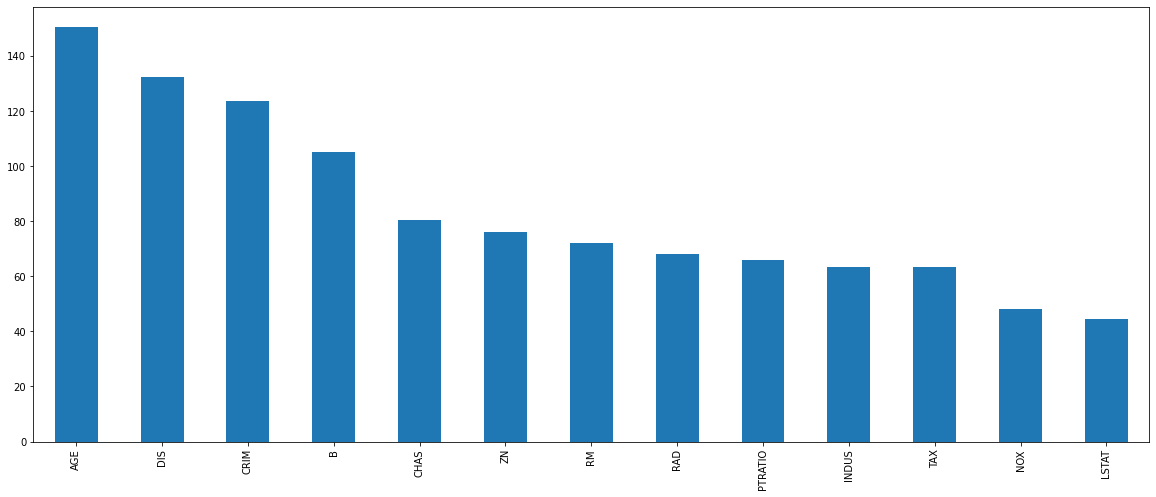

In [296]:
mse_values.sort_values(ascending=False).plot.bar(figsize = (20,8))

Remember that for regression, the smaller the mse, the better the model performance, so in this case we need to select from the right to the left

Used a lot when we have a lot of features and we need to start reducing the feature space quickly